In [5]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

target.unique()
target.value_counts().sort_index()

donated        178
not donated    570
Name: Class, dtype: int64

Dataset is imbalanced

Dummy Classifier :

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

model = DummyClassifier(strategy = "most_frequent")
cv = cross_validate(model, data, target, cv = 10)
print(cv["test_score"].mean())

0.762054054054054


Perform a balanced_accuracy scoring :

In [88]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, cross_val_score

model = DummyClassifier(strategy = "most_frequent")
cv = cross_validate(model, data, target, cv = 10, scoring="balanced_accuracy")
print(cv["test_score"].mean())

cv_score = cross_val_score(model, data, target, cv = 10, scoring="balanced_accuracy")
print(cv_score.mean())

0.5
0.5


K Nearest Neighbors :

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

cv_results = cross_validate(
    model, data, target, cv=10, return_train_score=True
)
cv_results = pd.DataFrame(cv_results)
cv_results[["train_score", "test_score"]].mean()

train_score    0.821302
test_score     0.652703
dtype: float64

Train score > test score : it overfits

In [13]:
from sklearn.model_selection import validation_curve

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

train_scores, test_scores = validation_curve(
    model, data, target, param_name="kneighborsclassifier__n_neighbors", param_range=param_range,
    cv=10, scoring="balanced_accuracy", n_jobs=-1)
train_errors, test_errors = -train_scores, -test_scores

Shape (rows = parameters and cols = cross validations)

In [42]:
print(train_scores.shape)
print(train_scores)

(9, 10)
[[0.88315058 0.87583455 0.8985441  0.88947978 0.88856603 0.87314206
  0.87294103 0.86625853 0.88647948 0.88149117]
 [0.84032651 0.84221491 0.83679946 0.85213207 0.85256457 0.82874025
  0.81804946 0.81583821 0.82714031 0.82598404]
 [0.7160575  0.70066399 0.68093933 0.70846126 0.70788865 0.71706262
  0.70026194 0.67076023 0.69338806 0.69898781]
 [0.70923489 0.67196637 0.67334308 0.6994883  0.69518762 0.69538865
  0.69206262 0.65593933 0.66775029 0.69624544]
 [0.70708455 0.65241228 0.6418616  0.66608796 0.67818592 0.6807383
  0.66978558 0.6387366  0.66117589 0.67919799]
 [0.63870614 0.58403387 0.57170443 0.61508285 0.63188353 0.65493421
  0.65473319 0.58363182 0.62354558 0.6483903 ]
 [0.57462841 0.52755239 0.51935307 0.52462841 0.53810307 0.56683114
  0.59982943 0.52677875 0.51917838 0.56728173]
 [0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5   

Axis 0 = vertical direction of rows (calculation by columns)  
Axis 1 = horizontal direction (calculation by rows)

In [72]:
train_params = (train_scores.min(axis=1), train_scores.max(axis=1))
print("min",  train_params[0])
print("max", train_params[1])
print(param_range)
print("mean training score : ", train_scores.mean(axis=1))
print("mean testing score : ", test_scores.mean(axis=1))
print(train_params[1].shape[0] == 9)

min [0.86625853 0.81583821 0.67076023 0.65593933 0.6387366  0.57170443
 0.51917838 0.5        0.5       ]
max [0.8985441  0.85256457 0.71706262 0.70923489 0.70708455 0.65493421
 0.59982943 0.5        0.5       ]
[1, 2, 5, 10, 20, 50, 100, 200, 500]
mean training score :  [0.88158873 0.83397898 0.69944714 0.68566066 0.66752667 0.62066459
 0.54641648 0.5        0.5       ]
mean testing score :  [0.46075851 0.49783282 0.52912797 0.53963708 0.58366013 0.57238562
 0.54183007 0.5        0.5       ]
True


In [60]:
train_cvs = (train_scores.min(axis=0), train_scores.max(axis=0))
print(train_cvs)
print(train_cvs[0].shape[0] == 10)

(array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]), array([0.88315058, 0.87583455, 0.8985441 , 0.88947978, 0.88856603,
       0.87314206, 0.87294103, 0.86625853, 0.88647948, 0.88149117]))
10
True


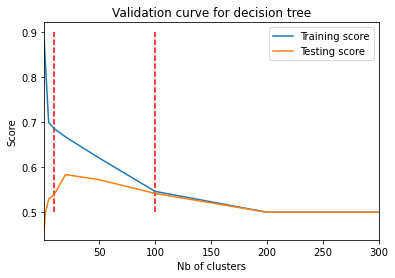

In [92]:
from matplotlib import pyplot as plt

plt.plot(param_range, train_scores.mean(axis=1), label="Training score")
plt.plot(param_range, test_scores.mean(axis=1), label="Testing score")
plt.legend()

plt.xlim(left = 1, right = 300)

plt.vlines(10, 0.5, 0.9, color="red", linestyles="dashed")
plt.vlines(100, 0.5, 0.9, color="red", linestyles="dashed")

plt.xlabel("Nb of clusters")
plt.ylabel("Score")
_ = plt.title("Validation curve for decision tree")

[0.42083022 0.33614616 0.17031917 0.14602358 0.08386654 0.04827897
 0.00458641 0.         0.        ]


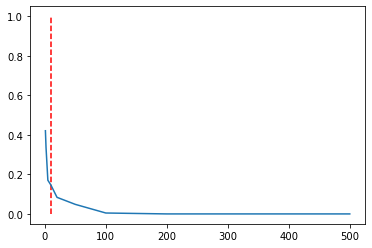

In [81]:
diff_test_train = abs(test_scores.mean(axis=1) - train_scores.mean(axis=1))
print(diff_test_train)

plt.plot(param_range, diff_test_train, label = "diff_test_train")
plt.vlines(10, 0, 1, color="red", linestyles="dashed")

Nb of params

In [44]:
print(model.get_params())
print(model.get_params()['kneighborsclassifier__n_neighbors'])

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('kneighborsclassifier', KNeighborsClassifier())], 'verbose': False, 'standardscaler': StandardScaler(), 'kneighborsclassifier': KNeighborsClassifier(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__leaf_size': 30, 'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__metric_params': None, 'kneighborsclassifier__n_jobs': None, 'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}
5
